In [37]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import ssl # to fix URL fetch failure error when loading in dataset
ssl._create_default_https_context = ssl._create_unverified_context

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



## Shape of Training Set

In [39]:
x_train.shape

(50000, 32, 32, 3)

In [40]:
# Peek at what first 5 classifications are in y_train
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### according to nums shown in y_train are indx values for 
### training set category names (6=frog, 9=truck, etc.)

In [41]:
# plotly function to display image in set
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

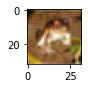

In [42]:
plot_sample(0) #first image in train set

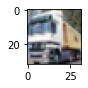

In [43]:
plot_sample(1)

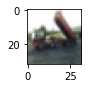

In [44]:
plot_sample(2)

In [45]:
# create class to identify image
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [46]:
y_train[3] #returns array index but want the label

array([4], dtype=uint8)

In [47]:
classes[y_train[3][0]]

'deer'

## Scale the images

In [48]:
# scaling between 0 & 1 to help with classification
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [49]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Convert to Categorical Class Using One-Hot-Encoding

In [50]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_train_categorical[:5] #provides 1 where index of category is 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

## Building Model

In [52]:
#Checking input shape
x_train.shape

(50000, 32, 32, 3)

In [53]:
#input layer size after flattening
32*32*3

3072

In [54]:
y_train_categorical # O-H-E output values again

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
model.fit(x_train_scaled, y_train_categorical, epochs=60)

Epoch 1/60
1563/1563 [==============================] - 69s 44ms/step - loss: 1.8130 - accuracy: 0.3554
Epoch 2/60
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6220 - accuracy: 0.4283
Epoch 3/60
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5396 - accuracy: 0.4563
Epoch 4/60
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4818 - accuracy: 0.4775
Epoch 5/60
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4327 - accuracy: 0.4937
Epoch 6/60
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3882 - accuracy: 0.5124
Epoch 7/60
1563/1563 [==============================] - 85s 54ms/step - loss: 1.3502 - accuracy: 0.5234
Epoch 8/60
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3165 - accuracy: 0.5377
Epoch 9/60
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2815 - accuracy: 0.5519
Epoch 10/60
1563/1563 [==============================] - 70s 45m

In [56]:
classes[np.argmax(model.predict(x_test_scaled)[0])]#gives index of maximum number then gives label

'cat'

In [57]:
classes[y_test[0][0]]

'cat'

In [59]:
y_predicted = model.predict(x_test_scaled)
y_predicted[1]

array([9.8963320e-01, 9.9766928e-01, 6.6326290e-02, 1.3224822e-01,
       2.2240877e-03, 2.9233098e-04, 2.5932964e-05, 2.9467854e-01,
       9.9999940e-01, 9.9814296e-01], dtype=float32)

In [60]:
np.argmax(y_predicted[1])

8

In [61]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 8, 8, 8, 4]

In [63]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[612,  17,   6,  92,  13,   5,  27,  34, 152,  42],
       [ 31, 622,   4,  54,   4,   2,  12,  32, 125, 114],
       [ 82,  10, 168, 347,  68,  38, 110, 116,  43,  18],
       [ 11,  11,   7, 733,  11,  36,  63,  87,  23,  18],
       [ 43,   4,  23, 278, 315,  13, 136, 138,  37,  13],
       [ 17,   5,   3, 595,  22, 171,  46, 106,  25,  10],
       [  7,  10,  14, 233,  31,  11, 638,  28,  17,  11],
       [ 26,  12,   5, 142,  22,  19,  12, 712,  24,  26],
       [ 73,  34,   3,  65,   3,   0,   3,  17, 776,  26],
       [ 37, 134,   0,  73,   3,  12,  15,  58,  99, 569]])>

Text(69.0, 0.5, 'True')

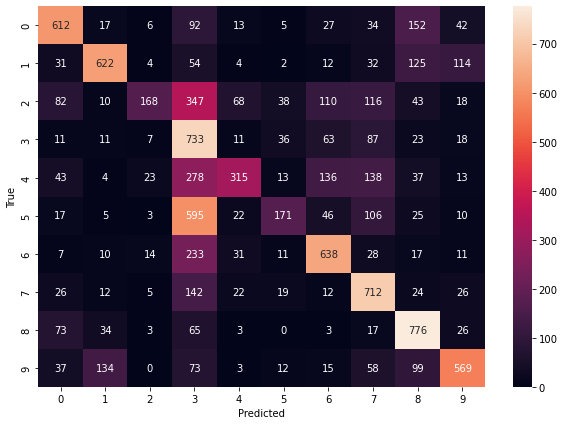

In [64]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")